## Project: Analyze A/B Test for a company web page


## Table of Contents
- [Introduction](#intro)
- [Part 1 - Calculating Probabilities](#probability)
- [Part 2 - Check A/B Test](#ab_test)
- [Part 3 - Using Regression](#regression)


<a id='intro'></a>
### Introduction:

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probabilities

Getting started; let's import our initial libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# using random seed to have fixed randomization
random.seed(42)

`1.` **Quiz 1**

a. Exploring the dataset:

In [3]:
# reading dataset
df = pd.read_csv('ab_data.csv')
df[:5]

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
len(df)

294478

c. The number of unique users in the dataset.

In [5]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [6]:
converted = df["converted"]
proportion = converted.mean()
proportion = proportion*100
print(proportion)

11.9659193556


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
command = 'landing_page=="new_page" and group=="control" or landing_page != "new_page" and group=="treatment"'
response = df.query(command)
len(response)

3893

f. Do any of the rows have missing values?

In [8]:
if df.isnull().any().any() == False:
  print('There are no null values.')
else: print('Yes there are null values.')

There are no null values.


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# query commands
cmd1 = "landing_page == 'old_page' and group == 'treatment'"
cmd2 = "landing_page == 'new_page' and group == 'control'"

# getting responses
response1 = df.query(cmd1)
response2 = df.query(cmd2)

# getting the indexes
index1 = response1.index
index2 = response2.index

# dropping indexes
df = df.drop(index1)
df = df.drop(index2)
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
# creating a copy of dataframe
df2 = df.copy()

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
pd.concat(g for _, g in df2.groupby("user_id") if len(g) > 1)

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
pd.concat(g for _, g in df2.groupby("user_id") if len(g) > 1)

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# dropping duplicates
ids = 'user_id'
df2 = df2.drop_duplicates(ids)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
converted = df2['converted']
prob = converted.mean()
print(prob)

0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control = df2[((df2['group'] == 'control'))]
converted = control['converted']
converted = converted.mean()
print(converted)

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment = df2[((df2['group'] == 'treatment'))]
treatment = treatment['converted']
treatment = treatment.mean()
print(treatment)

0.118808065515


d. What is the probability that an individual received the new page?

In [18]:
new_page = df2[((df2['landing_page'] == 'new_page'))]
landing_page = df2['landing_page']

print(len(new_page)/len(landing_page))

0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**

From both the groups, about 12% of people converted. So, no, there is not sufficient evidence to conclude that new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_0: p_{old} - p_{new} \ge 0$

$H_1: p_{old} - p_{new} < 0$

where $p_{old}$ and $p_{new}$ are the converted rates for the old and new pages respectively.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
converted = df2['converted']
new_p = converted.mean()
print(new_p)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
converted = df2['converted']
old_p = converted.mean()
print(old_p)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
group = df2[((df2['group'] == 'treatment'))]
new_n = len(group)
print(new_n)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
group = df2[((df2['group'] == 'control'))]
old_n = len(group)
print(old_n)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# generating array with new_n length random values from 0 or 1 and p(0) = new_p, p(1) = 1-new_p
new_page_converted = np.random.choice(np.arange(0,2), new_n, [new_p, 1 - new_p])
print(new_page_converted)

[1 1 0 ..., 1 0 1]


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# generating array with old length random values from 0 or 1 and p(0) = old_p, p(1) = 1-old_p
old_page_converted = np.random.choice(np.arange(0,2), old_n, [old_p, 1 - old_p])
print(old_page_converted)

[0 1 1 ..., 0 0 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_mean = new_page_converted.mean()
old_page_mean = old_page_converted.mean()
p_diff = new_page_mean - old_page_mean
print(p_diff)

0.00450823712488


>An error occurs when calculating difference b/w $p_{new}$ - $p_{old}$ due to mismatch in sizes; so, difference in means is calculated instead.

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []

for x in range(10000):
  # generating arrays and appending their mean differences to p_diffs
  new_page_converted = np.random.choice(np.arange(0,2), new_n, [new_p, 1 - new_p])
  old_page_converted = np.random.choice(np.arange(0,2), old_n, [old_p, 1 - old_p])
  new_page_mean = new_page_converted.mean()
  old_page_mean = old_page_converted.mean()
  p_diffs.append(new_page_mean - old_page_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

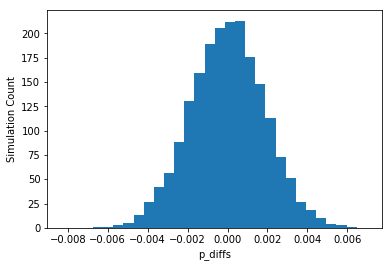

In [27]:
# plotting histogram
plt.hist(p_diffs, density=True, bins=30);
plt.xlabel('p_diffs')
plt.ylabel('Simulation Count')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# getting converted with treatment group
group = df2[((df2['group'] == 'treatment'))]
converted_group1 = group['converted']
converted_group_mean1 = converted_group1.mean()

# getting converted with control group
group = df2[((df2['group'] == 'control'))]
converted_group2 = group['converted']
converted_group_mean2 = converted_group2.mean()
out = converted_group_mean1 - converted_group_mean2
print(out)

-0.00157823898536


In [29]:
# converting list to numpy array for processing
p_diffs = np.array(p_diffs)

# p_diffs > mean
array = (p_diffs > out)

proportion = array.mean()
print(proportion)

0.8021


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

First, we figured out the p-value which represents the probability to get our stats for true null. A bigger p-value will point to the fact that stats will originate from null hypothesis.Since 0.9 (p-value) > 0.05 (alpha), so we do not have any statistical evidence in order to reject null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

# getting converted with control group
control = df2[((df2['group'] == 'control'))]
control_converted = control['converted']
control_converted_sum = control_converted.sum()

# getting converted with treatment group
treatment = df2[((df2['group'] == 'treatment'))]
treatment_converted = treatment['converted']
treatment_converted_sum = treatment_converted.sum()

# getting old landing page
old_page = df2[((df2['landing_page'] == 'old_page'))]
old_n = len(old_page)

# getting new landing page
new_page = df2[((df2['landing_page'] == 'new_page'))]
new_n = len(new_page)

print(control_converted_sum, treatment_converted_sum, old_n, new_n)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
count = np.array([control_converted_sum, treatment_converted_sum])
nobs = np.array([old_n, new_n])
stats, p_value = sm.stats.proportions_ztest(count, nobs)
print(stats, p_value)

1.31092419842 0.189883374482


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

The z-score has a value = 1.31. It is less than the threshold value for a confidence level of 95% (1.96). So, we conclude that there is no evidence to reject null hypthesis. On the other hand, the resultant p-value is quite similar to the result in j and k, which also can't reject null hypothesis, hence it strengthens the chance of the null hypothesis being true.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

We can use logistic regression for binary data between 0 and 1.


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# getting dummy values
df_temp = pd.get_dummies(df2.group)
df2['ab_page'] = df_temp['control']
df2['intercept'] = 1
df2

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
# getting intercept and page
converted = df2.converted
df_temp = pd.DataFrame()
df_temp['ab_page'] = df2['ab_page']
df_temp['intercept'] = df2['intercept']

log_mod = sm.Logit(converted, df_temp)


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
# fitting model and providing summary
output = log_mod.fit()
output.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


AttributeError: module 'scipy.stats' has no attribute 'chisqprob'

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>

**Answer**

ab_page p-value = 0.19 < p-value in part 2 = 0.9
It differs because the null and alternative hypothesis are different for both.


**<u>Part II Case:</u>**
$$H_0: p_{old} - p_{new} \ge 0$$


$$H_1: p_{old} - p_{new} < 0$$

**<u>Logistic Regression Case:</u>**
$$H_0: p_{old} = p_{new}$$


$$H_1: p_{old} \ne p_{new}$$

**$p_{old}$ and $p_{new}$ are the converted rates for the old and new pages respectively.**

**Because the latter relies solely on two possible outcomes, it may be the reason that it yields a lower probability in the null hypothesis than that in the case in Part II of the earlier exercise.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**<u>Advantages:</u>**<br>

- We can make a model for multiple attributes, enabling us to weigh in other factors contributing to the outcome. 

- We can easily identify the outliers in data.<br>

**<u>Disdvantages:</u>**<br>

- Due to existence of correlated errors, accuracy might be low.<br>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
# reading the countries dataset
countries = pd.read_csv('countries.csv')
countries = countries.set_index('user_id')
df2 = df2.set_index('user_id')
df3 = countries.join(df2)
df3

In [ ]:
# getting dummies and adding US and UK to df3
dummies = pd.get_dummies(df3.country)
us = dummies['US']
uk = dummies['UK']
df3['US'] = us
df3['UK'] = uk
df3

In [ ]:
# adding intercept and countries
converted = df3.converted
df_temp = pd.DataFrame()
df_temp['intercept'] = df3['intercept']
df_temp['UK'] = df3['UK']
df_temp['US'] = df3['US']

# fitting model
log_mod = sm.Logit(converted,df_temp)
output = log_mod.fit()
output.summary()

**Inference:** 

The p-value > 0.05 for both US and UK. Hence, countries don't impact conversion significantly.

Combining country and ab_page.

In [ ]:
# adding intercept, countries and page
converted = df3.converted
df_temp = pd.DataFrame()
df_temp['intercept'] = df3['intercept']
df_temp['UK'] = df3['UK']
df_temp['US'] = df3['US']
df_temp['ab_page'] = df3['ab_page']

# fitting model
output = log_mod.fit()
output.summary()

**Inference:** 

There is no apparent impact of ab_page on conversion because all p-values > 5.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
# adding intercept and countries with page
uk = df3['UK']
page = df3['ab_page']
uk_page = uk*page

us = df3['US']
us_page = us*page

df3['UK_with_Page'] = uk_page
df3['US_with_Page'] = us_page

converted = df3.converted

df_temp = pd.DataFrame()
df_temp['intercept'] = df3['intercept']
df_temp['UK_with_Page'] = df3['UK_with_Page']
df_temp['US_with_Page'] = df3['US_with_Page']

# fitting model
log_mod = sm.Logit(converted, df_temp)
output = log_mod.fit()
output.summary()

**Inference**

Interaction has no effect on the conversion either.

## Conclusion

We can see from the results above that countries and new page have no effect on conversion rates, so the company should avoid implementing this page because we couldn't find any evidence that it is superior in any way to the old page.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])